In [1]:
!pip install deepchem
import deepchem as dc
dc.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.8.1 which is incompatible.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.7.1'

In [2]:
!pip install rdkit

In [3]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
import io
from google.colab import files
import mols2grid

In [5]:
from google.colab import files
uploaded = files.upload()

Saving BBBP_curated_w.xlsx to BBBP_curated_w.xlsx


In [7]:
df2 = pd.read_excel('BBBP_curated_w.xlsx')

df2 = df2.rename(columns={"p_np": "y", "smiles": "ids"})
df2

,num,name,y,ids,ROMol,morgan,w
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
...,...,...,...,...,...,...,...
1957,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
1958,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
1959,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257
1960,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,NaN,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,1.216257


In [8]:
ids_list = df2['ids'].values.tolist()
ids = df2['ids']
ids = pd.DataFrame(ids)
datapoints = len(ids_list)
featurizer = dc.feat.CircularFingerprint(size=1024)
#featurizer = dc.feat.ConvMolFeaturizer(datapoints)
features = featurizer.featurize(ids_list)
features = pd.DataFrame(features)
features_list = list(features.columns.values)
list_X = []
for i in range(1,len(features_list)+1):
#    list_X.append('X')
    list_X.append('X'+str(i))

features.set_axis(list_X, axis=1,inplace=True)
df_featurized2 = pd.concat([features, ids, df2.y, df2.w], axis=1, join='inner')
df_featurized2

[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:16] WARNING: not removing hydrogen atom without neighbors
[12:20:17] WARNING: not removing hydrogen atom without neighbors
[12:20:17] WARNING: not removing hydrogen atom without neighbors
[12:20:17] WARNING: not r

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,ids,y,w
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,1,1.216257
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,1,1.216257
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,1,1.216257
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,1,1.216257
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,1,1.216257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,1,1.216257
1958,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,1,1.216257
1959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,1,1.216257
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...,1,1.216257


In [9]:
# Convertig dataframe concat into NumpyDataset object (datasetnp)
datasetnp = dc.data.NumpyDataset.from_dataframe(df_featurized2)

# Creating a RandomSplitter object and splitting into just only train and valid datasets
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(datasetnp,frac_train = 0.8, frac_valid = 0.2, frac_test= 0.0)
#transformers_train = dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)
#train_dataset = transformers_train.transform(train_dataset)
#transformers_valid = dc.trans.NormalizationTransformer(transform_y=True, dataset=valid_dataset)
#valid_dataset = transformers_valid.transform(valid_dataset)
#transformers_test = dc.trans.NormalizationTransformer(transform_y=True, dataset=test_dataset)
#test_dataset = transformers_test.transform(test_dataset)

##Training model and its metrics

In [10]:
n_tasks = 1
n_features = train_dataset.X.shape[1]

##Hyperparametrization

In [11]:
params_dict = {
    'n_tasks': [1],
    'n_features': [1024],
    'layer_sizes': [[256,256], [256,256,256], [256,256,256,256]],
    'dropouts': [0,0.1],
    'learning_rate': [0.005, 0.0035, 0.0025, 0.001],
    'nb_epoch': [5, 10, 20, 30, 40, 50],
    'momentum': [0,0.9],
    'decay': [0,0.1],
    'batch_size': [32,64,128]

}
optimizer = dc.hyper.GridHyperparamOpt(dc.models.MultitaskClassifier)
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(
        params_dict, train_dataset, valid_dataset, metric)

print(best_hyperparams)

{'n_tasks': 1, 'n_features': 1024, 'layer_sizes': [256, 256, 256, 256], 'dropouts': 0.1, 'learning_rate': 0.0025, 'nb_epoch': 50, 'momentum': 0.9, 'decay': 0.1, 'batch_size': 128}


###Finding the best number of epochs

In [12]:
import random
import torch
d = best_hyperparams
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)
model = dc.models.fcnet.MultitaskClassifier(n_tasks = n_tasks, n_features = n_features, dropouts = d['dropouts'], learning_rate = d['learning_rate'], decay = d['decay'], momentum = d['momentum'], layer_sizes = d['layer_sizes'], batch_size= d['batch_size'])
callback = dc.models.ValidationCallback(valid_dataset, d['batch_size'], metrics=[metric], save_on_minimum=False, save_dir="/content/")
model.fit(train_dataset, nb_epoch= d['nb_epoch'], callbacks=callback)
reload_model = dc.models.fcnet.MultitaskClassifier(n_tasks=n_tasks, n_features=n_features, batch_size= d['batch_size'], dropouts = d['dropouts'], layer_sizes = d['layer_sizes'], model_dir="/content/")
reload_model.restore()

Step 128 validation: mean-roc_auc_score=0.906381
Step 256 validation: mean-roc_auc_score=0.888436
Step 384 validation: mean-roc_auc_score=0.880451
Step 512 validation: mean-roc_auc_score=0.882409
Step 640 validation: mean-roc_auc_score=0.893378


In [13]:
print("Train scores")
print(model.evaluate(train_dataset, [metric]))
print("Validation scores")
print(model.evaluate(valid_dataset, [metric]))

Train scores
{'mean-roc_auc_score': 0.9998453026196927}
Validation scores
{'mean-roc_auc_score': 0.8940305845653058}


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr = LogisticRegression(random_state=0) #random_state parameter is provided to control the random number generator used whenever randomization is part of a Scikit-learn algorithm.
lr.fit(train_dataset.X, train_dataset.y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [15]:
y_pred = lr.predict(valid_dataset.X)
print("Accuracy score: " + str(accuracy_score(valid_dataset.y, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(valid_dataset.y, y_pred)))
print("\nClassification report: \n" + str(classification_report(valid_dataset.y, y_pred)))

Accuracy score: 0.8676844783715013

Confusion matrix: 
[[ 71  30]
 [ 22 270]]

Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       101
           1       0.90      0.92      0.91       292

    accuracy                           0.87       393
   macro avg       0.83      0.81      0.82       393
weighted avg       0.86      0.87      0.87       393



In [16]:
train_accuracy = lr.score(train_dataset.X, train_dataset.y)
valid_accuracy = lr.score(valid_dataset.X, valid_dataset.y)
print('One-vs-rest', '-'*35,
      'Accuracy in Train Group   : {:.3f}'.format(train_accuracy),
      'Accuracy in Valid Group   : {:.3f}'.format(valid_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.982
Accuracy in Valid Group   : 0.868


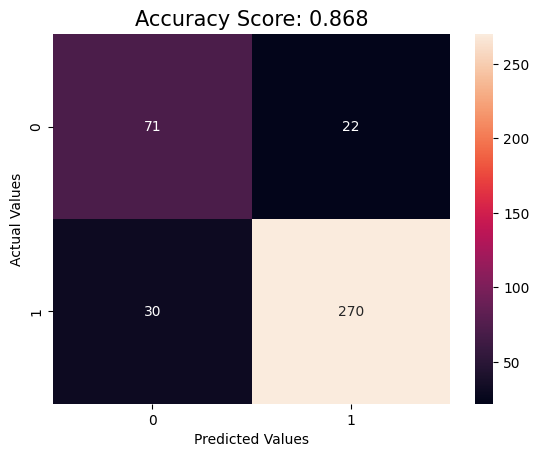

In [17]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
import matplotlib.pyplot as plt

predictions = lr.predict(valid_dataset.X)
score = round(accuracy_score(valid_dataset.y, predictions), 3)
cm1 = cm(predictions, valid_dataset.y)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

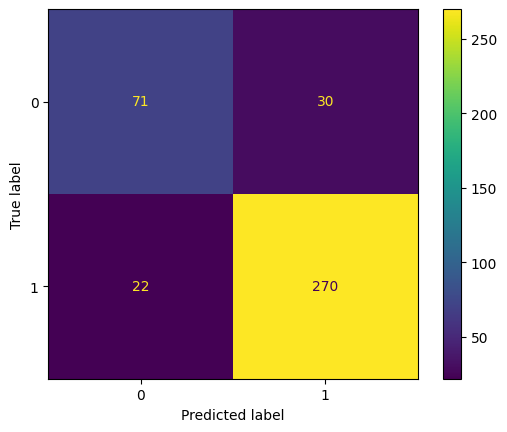

In [19]:
# Create the confusion matrix

cm = confusion_matrix(valid_dataset.y, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [20]:
from sklearn.metrics import precision_score

print("precision score         : ",  precision_score(valid_dataset.y, predictions, average='micro'))

precision score         :  0.8676844783715013


In [21]:
from sklearn.metrics import recall_score

print("recall score            : ",  recall_score(valid_dataset.y, predictions, average='micro'))

recall score            :  0.8676844783715013


In [22]:
from sklearn.metrics import f1_score

precision_s = precision_score(valid_dataset.y, predictions,average='micro')
recall_s    = recall_score(valid_dataset.y, predictions, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))

F1_score     :  0.8676844783715013


In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(train_dataset.X, train_dataset.y)
y_pred = dt.predict(valid_dataset.X)
print("Accuracy score: " + str(accuracy_score(valid_dataset.y, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(valid_dataset.y, y_pred)))
print("\nClassification report: \n" + str(classification_report(valid_dataset.y, y_pred)))

Accuracy score: 0.8346055979643766

Confusion matrix: 
[[ 41  60]
 [  5 287]]

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.41      0.56       101
           1       0.83      0.98      0.90       292

    accuracy                           0.83       393
   macro avg       0.86      0.69      0.73       393
weighted avg       0.84      0.83      0.81       393



[Text(0.5, 0.875, 'x[5] <= 0.5\nentropy = 0.787\nsamples = 1569\nvalue = [369, 1200]'),
 Text(0.25, 0.625, 'x[357] <= 0.5\nentropy = 0.699\nsamples = 1436\nvalue = [271, 1165]'),
 Text(0.125, 0.375, 'x[807] <= 0.5\nentropy = 0.642\nsamples = 1385\nvalue = [226, 1159]'),
 Text(0.0625, 0.125, 'entropy = 0.366\nsamples = 529\nvalue = [37, 492]'),
 Text(0.1875, 0.125, 'entropy = 0.762\nsamples = 856\nvalue = [189, 667]'),
 Text(0.375, 0.375, 'x[36] <= 0.5\nentropy = 0.523\nsamples = 51\nvalue = [45, 6]'),
 Text(0.3125, 0.125, 'entropy = 0.9\nsamples = 19\nvalue = [13, 6]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.75, 0.625, 'x[893] <= 0.5\nentropy = 0.831\nsamples = 133\nvalue = [98, 35]'),
 Text(0.625, 0.375, 'x[821] <= 0.5\nentropy = 0.297\nsamples = 19\nvalue = [1, 18]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'x[588] <= 0.5\nentrop

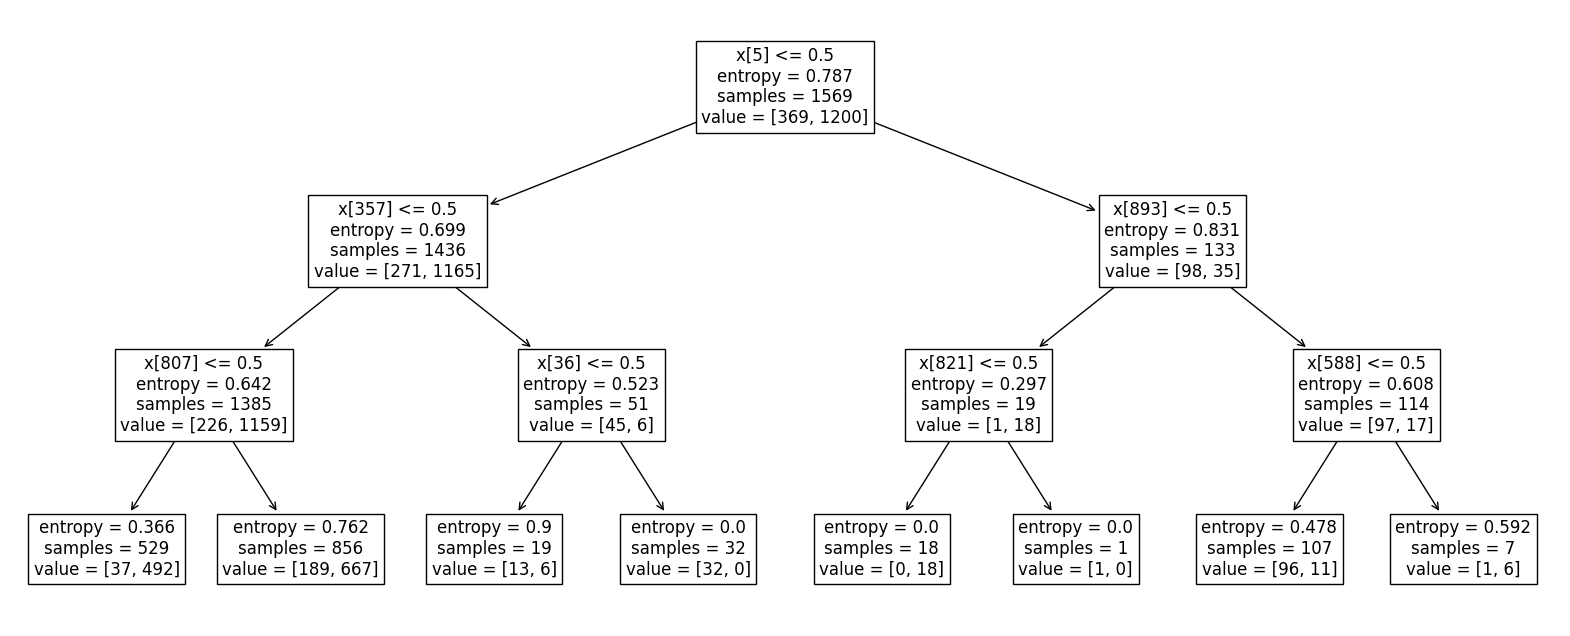

In [24]:
fig = plt.subplots(figsize=(20, 8))
tree.plot_tree(dt, fontsize=12)

interactive(children=(IntSlider(value=1, description='max_depth:', max=6, min=1), Output()), _dom_classes=('wi…

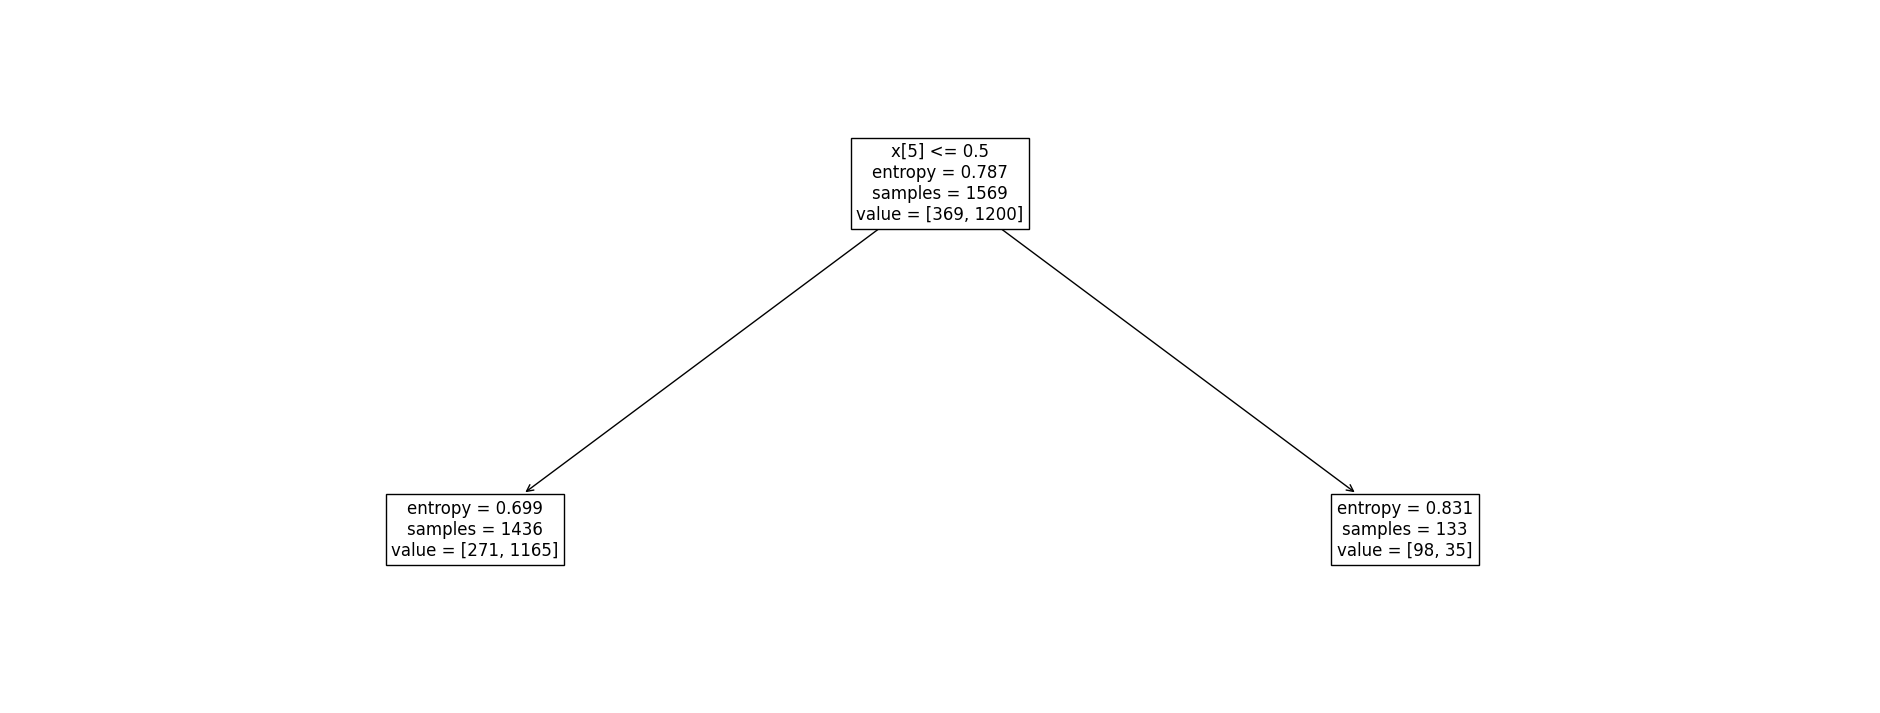

In [25]:
import ipywidgets as widgets
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

value_max_depth = widgets.IntSlider(value=1, min=1, max=6, step=1, description='max_depth:')

def DecisionTree(valor):
  dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = valor, random_state = 1)
  dt.fit(train_dataset.X, train_dataset.y)
  y_pred = dt.predict(valid_dataset.X)
  fig = plt.subplots(figsize=(20+4*valor, 8+valor))
  tree.plot_tree(dt, fontsize=12)


widgets.interact(DecisionTree , valor = value_max_depth);

##Explaining model (LIME)

In [26]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=0a6461177db81a39a27558b8f9d2068c67e6feb593de87f9fe6b1950fe8c3b66
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [27]:
from lime import lime_tabular
feature_names = ["fp_%s"  % x for x in range(n_features)]
explainer = lime_tabular.LimeTabularExplainer(train_dataset.X,
                                              feature_names=feature_names,
                                              categorical_features=feature_names,
                                              class_names=['np', 'p'],
                                              discretize_continuous=True)

In [28]:
#FUNÇÕES
# We need a function which takes a 2d numpy array (samples, features) and returns predictions (samples,)

def eval_model(my_model,i):
    def eval_closure(x):
        ds = dc.data.NumpyDataset(x, n_tasks=n_tasks)
        # The 0th task is NR-AR
        predictions = my_model.predict(ds)[:,i]
        return predictions
    return eval_closure

##################################
def fp_mol(mol, fp_length=n_features):
    """
    returns: dict of <int:list of string>
        dictionary mapping fingerprint index
        to list of SMILES strings that activated that fingerprint
    """
    d = {}
    feat = dc.feat.CircularFingerprint(sparse=True, smiles=True, size=n_features)
    retval = feat._featurize(mol)
    for k, v in retval.items():
        index = k % fp_length
        if index not in d:
            d[index] = set()
        d[index].add(v['smiles'])
    return d
#######################
def verifTox(l):
  somaTox = 0.0
  somaNao = 0.0

  for peso in l:
      if peso > 0:
        somaTox += peso
      else:
        somaNao += peso
  if abs(somaTox) > abs(somaNao):
    return ("YES",somaTox,somaNao)
  else:
    return ("NO",somaTox,somaNao)
#########################

In [29]:
import statistics as st

dfAllFragMolPeso = pd.DataFrame()
dfAllMolTasksInfo = pd.DataFrame()
dfAllMolTox = pd.DataFrame()

for i in range(n_tasks):
    model_fn = eval_model(model,i)
    lista_active_id = np.where((valid_dataset.y[:,i] == 1) * (model.predict(valid_dataset)[:,0,1] > 0.8))[0] #list of molecules which are toxic and (*) are predicted as such by the model
    print('\nTASK:',i)
    print()

    #Dataframe that indicates if the molecule is toxic or not and how much is it(total)
    dfMolTox = pd.DataFrame(columns=["Task","Molecule Index","Molecule Id","Result","Penetrate","Non-Penetrate"])

    for active_id in lista_active_id:
      exp = explainer.explain_instance(valid_dataset.X[active_id], model_fn, num_features=100, top_labels=1)
      print('check', active_id)

      # What fragments activated what fingerprints in our active molecule?
      my_fragments = fp_mol(Chem.MolFromSmiles(valid_dataset.ids[active_id]))
      q = [key for key in exp.as_map().keys()][0]
      map = exp.as_map()[q]
      dic = dict(map)
      lista_pesos = []

      #Dataframe with molecule's information, its toxic fragments and weight
      dfFragMolPeso = pd.DataFrame(columns=["Task","Fingerprint","Fragment SMILES","Weight","Active Molecule"])

      for fp_index in my_fragments:
        if fp_index in dic:
          peso = dic[fp_index]
          frag = my_fragments[fp_index]
          lista_pesos.append(peso)

          if peso > 0: #Weight that positively contributes to toxicity
              dfFragMolPeso.loc[dfFragMolPeso.shape[0]] = [i,fp_index,frag, peso,active_id]#Adding a row at the bottom

      #Inserting data at dfMolTox
      vt = verifTox(lista_pesos) #variable that contains the sum of all of toxic fragments weight, non toxic fragment weight and the result of the molecule (if it's more toxic or not)
      smile = valid_dataset.select([active_id]).ids[0] #smile of the molecule in question
      dfMolTox.loc[dfMolTox.shape[0]] = [i,active_id,smile,vt[0],vt[1],vt[2]]
      dfAllMolTox = dfAllMolTox.append(dfMolTox)

      #Putting together all dfFragMolPeso
      if len(lista_pesos) != 0:
          #Selecting a minimum toxicity contribution (a minimum weight) to assess which fragments could be discarded. Setting a tolerance
          tol = st.mean(lista_pesos) #weight's mean
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Weight']<tol].index,inplace=True) #dropping indexes which have less weight than the tol tolerance


          #Unsetting set object of column Fragment Smiles in dfFragMolPeso
          for (j,set_smiles) in enumerate(dfFragMolPeso['Fragment SMILES']): #el = set_smiles

              if  set_smiles == None or len(set_smiles) == 0:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = np.nan

              elif len(set_smiles) > 1: #If fp is activated by more than one fragment
                  k = j
                  for smi in set_smiles:
                    if smi != '': #Passing by possible bug (Empty smile)
                      if k == j: #Represents the first smile of the set of smiles
                          dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
                          k = dfFragMolPeso.shape[0] #From now on k will be always the index of the new adding row
                      else:
                          dfFragMolPeso.loc[k] = dfFragMolPeso.iloc[j] #copying data of original row (all the information, exept smile)
                          dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
              else:
                  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]

          #Dropping possible bugs (empty smile)
          dfFragMolPeso.dropna(inplace=True)
          dfFragMolPeso.drop(dfFragMolPeso.loc[dfFragMolPeso['Fragment SMILES'].isin([''])].index,inplace=True)

          dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


    #Exporting data of the molecule's toxicity classification (dfMolTox)
    dfMolTox.to_excel('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')
    files.download('TASK'+str(i)+'-Classificacao das Moleculas.xlsx')




TASK: 0

check 0


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 1


[13:27:07] WARNING: not removing hydrogen atom without neighbors
<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 2


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 4


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 5


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 6


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 7


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 8


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 9


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 10


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 11


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 12


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 14


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 16


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 18


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 20


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 24


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 25


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 26


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 27


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 29


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 32


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 35


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 36


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 38


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 39


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 40


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 41


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 43


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 45


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 48


[13:38:36] WARNING: not removing hydrogen atom without neighbors
<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 50


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 51


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 52


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 53


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 54


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 55


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 56


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 58


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 60


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 61


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 63


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 64


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 65


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 66


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 68


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 76


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 77


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 78


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 80


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 81


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 82


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 84


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 85


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 87


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 89


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 90


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 91


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 92


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 93


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 95


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 96


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 97


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 98


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 100


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 102


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 103


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 105


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 107


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 108


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 109


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 110


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 112


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 115


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 116


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 118


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 120


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 121


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 123


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 124


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 125


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 126


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 128


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 129


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 130


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 131


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 132


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 133


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 135


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 136


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 137


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 138


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 140


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 141


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 142


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 143


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 146


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 147


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 152


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 153


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 155


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 156


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 157


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 158


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 159


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 160


[14:08:14] WARNING: not removing hydrogen atom without neighbors
<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 161


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 162


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 167


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 169


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 170


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 172


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 173


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 174


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 175


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 177


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 178


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 179


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 180


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 181


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 182


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-29-18225848e8cb>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-29-18225848e8cb>:69: SettingWithCo

check 184


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 186


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 188


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 190


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 192


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 194


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 195


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 202


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 203


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 204


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 206


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 207


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 208


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 209


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 211


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 212


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 214


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 215


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 216


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 217


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 218


[14:22:19] WARNING: not removing hydrogen atom without neighbors
<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 219


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 220


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 221


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 222


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 223


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 229


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 231


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 235


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 236


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 238


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 242


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 243


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 244


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 245


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 246


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 247


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 248


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 249


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 250


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 251


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 252


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 255


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 256


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 257


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 259


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 260


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 262


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 263


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 264


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 266


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 267


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 268


[14:35:15] WARNING: not removing hydrogen atom without neighbors
<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 269


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 270


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 271


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 272


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 273


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 274


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 275


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 277


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 279


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 280


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 282


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 283


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 285


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 286


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 289


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 291


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 292


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 293


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 294


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 296


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[k] = smi
<ipython-input-29-18225848e8cb>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].loc[k] = smi #modifying the fragment smile (which is still in set) to the smile alone (isolated) in the new position k
<ipython-input-29-18225848e8cb>:75: FutureWarning

check 297


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 298


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 299


[14:44:16] WARNING: not removing hydrogen atom without neighbors
<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 300


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 301


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 302


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 303


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 304


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 305


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 306


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 310


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 312


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 313


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 314


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 315


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 316


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 318


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 320


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 322


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 324


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 325


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 326


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 328


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 331


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 333


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 334


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 335


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 337


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 339


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 341


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 342


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 343


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 346


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 347


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 348


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 349


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 350


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 351


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 353


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 355


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 359


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 360


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 361


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 363


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 364


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 365


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 368


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 370


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 371


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 372


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 374


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 375


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 377


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 378


[15:04:18] WARNING: not removing hydrogen atom without neighbors
<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 379


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 380


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 382


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 383


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 384


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 385


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 386


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 387


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 388


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 389


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)


check 391


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFragMolPeso['Fragment SMILES'].iloc[j] = list(set_smiles)[0]
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


check 392


<ipython-input-29-18225848e8cb>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllMolTox = dfAllMolTox.append(dfMolTox)
<ipython-input-29-18225848e8cb>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfAllFragMolPeso = dfAllFragMolPeso.append(dfFragMolPeso)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
print(lista_active_id)

[  0   1   2   4   5   6   7   8   9  10  11  12  14  16  18  20  24  25
  26  27  29  32  35  36  38  39  40  41  43  45  48  50  51  52  53  54
  55  56  58  60  61  63  64  65  66  68  76  77  78  80  81  82  84  85
  87  89  90  91  92  93  95  96  97  98 100 102 103 105 107 108 109 110
 112 115 116 118 120 121 123 124 125 126 128 129 130 131 132 133 135 136
 137 138 140 141 142 143 146 147 152 153 155 156 157 158 159 160 161 162
 167 169 170 172 173 174 175 177 178 179 180 181 182 184 186 188 190 192
 194 195 202 203 204 206 207 208 209 211 212 214 215 216 217 218 219 220
 221 222 223 229 231 235 236 238 242 243 244 245 246 247 248 249 250 251
 252 255 256 257 259 260 262 263 264 266 267 268 269 270 271 272 273 274
 275 277 279 280 282 283 285 286 289 291 292 293 294 296 297 298 299 300
 301 302 303 304 305 306 310 312 313 314 315 316 318 320 322 324 325 326
 328 331 333 334 335 337 339 341 342 343 346 347 348 349 350 351 353 355
 359 360 361 363 364 365 368 370 371 372 374 375 37

In [31]:
#Setting task as index
dfAllFragMolPeso.set_index('Task',inplace=True)

In [32]:
#Grouping dfAllFragMolPeso by its tasks
ag = dfAllFragMolPeso.groupby(level=0)

In [33]:
#Function to count how much a smile appears in a task
def contaSmile (grupoFrag):
    dic ={}
    for smile in grupoFrag['Fragment SMILES']:
      qtdSmile = dic.get(smile,0)
      qtdSmile += 1
      dic[smile] = qtdSmile
    return dic

#Funciton to sum the weights of each smile of the task
def somaPesos (grupoFrag):
  dic = {}
  for smile in grupoFrag['Fragment SMILES']:
    soma = dic.get(smile,0)
    if soma == 0:
        pesosSmile = grupoFrag['Weight'].loc[grupoFrag['Fragment SMILES'] == smile]
        soma = sum(pesosSmile)
        dic[smile] = soma
  return dic


In [34]:
def pegaMolecula(grupoFrag):
  return list(grupoFrag['Active Molecule'])

In [35]:
"""
The next command counts how much a fragment repeats in a task
"""
srTaskSmiQtd = ag.apply(contaSmile)
srTaskSmiWeightTotal = ag.apply(somaPesos)
dfAllTasksInfo = pd.DataFrame()

dftop10Tasks = pd.DataFrame()

for i,task in enumerate(srTaskSmiQtd.index):
  dicTask = srTaskSmiQtd.values[i]
  dicTaskWeight = srTaskSmiWeightTotal.values[i]

  d = pd.DataFrame(dicTask.values(),index=dicTask.keys())
  d.rename_axis('Fragment SMILES',inplace=True)
  d.rename(columns={0:'Quantity'},inplace=True)
  d['Task'] = task
  d.reset_index(inplace=True)
  PandasTools.AddMoleculeColumnToFrame(d,smilesCol='Fragment SMILES')
  d.set_index('Fragment SMILES',inplace=True)

  #Adding Total Weight of each smile
  d['Total Weight'] = dicTaskWeight.values()

  #Grouping Smile and adding a new column with all the active molecules for each specific fragment smile
  agFragTot = dfAllFragMolPeso.loc[dfAllFragMolPeso.index==task].groupby(by='Fragment SMILES')
  srMolecules = agFragTot.apply(pegaMolecula)
  d['Active Molecules'] = srMolecules

  #Setting multindex
  d.reset_index(inplace=True)
  d.set_index(['Task','Fragment SMILES'],inplace=True)
  d.sort_values(by='Total Weight',ascending=False,inplace=True)

  #Deleting the compounds that does not have ROMol Structures
  d.dropna(inplace=True)

  dftop10Tasks = dftop10Tasks.append(d.head(10))
  dfAllTasksInfo = dfAllTasksInfo.append(d)



[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 2 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 1 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] non-ring atom 0 marked aromatic
[15:08:58] 

##Highlights of top10

In [36]:
#Highlight of the top5 of each task

lHighlights = []
for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():
  index_mol = lmolecules[0]
  molecule_smile = valid_dataset.ids[index_mol]
  m = Chem.MolFromSmiles(molecule_smile)
  substructure = Chem.MolFromSmiles(frag)
  m.GetSubstructMatches(substructure)
  lHighlights.append(m)

<ipython-input-36-c7644cb1e50d>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ((task,frag),lmolecules) in dftop10Tasks['Active Molecules'].iteritems():


In [37]:
dftop10Tasks['Highlight First Active Molecule'] = lHighlights

In [38]:
valid_dataset.to_dataframe()['ids'].to_excel('valid_dataset_molecules.xlsx')
files.download('valid_dataset_molecules.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Exporting Data

In [39]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.3 MB/s eta 0:00:00


In [40]:
from google.colab import files

#Exporting dfAllTasksInfo without figures
dfAllTasksInfo.to_excel('Contribuição SMILES em Tasks.xlsx')
files.download('Contribuição SMILES em Tasks.xlsx')

#Exporting dfAllTasksInfo with figures
dfAllTasksInfo.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dfAllTasksInfo,'Contribuição SMILES em Tasks_COM FIGURA.xlsx', molCol='ROMol',size=(100,100))
files.download('Contribuição SMILES em Tasks_COM FIGURA.xlsx')

#Exporting dfAllFragMolPeso
dfAllFragMolPeso.to_excel('Descrição Fingerprint,SMILES e Moleculas.xlsx')
files.download('Descrição Fingerprint,SMILES e Moleculas.xlsx')

#Exporting dftop10Tasks
dftop10Tasks.to_excel('Highlights Top 10.xlsx')
files.download('Highlights Top 10.xlsx')

#Exporting dfAllTasksInfo with figures
dftop10Tasks.reset_index(inplace=True)
PandasTools.SaveXlsxFromFrame(dftop10Tasks,'Highlights Top 10_COM FIGURA.xlsx', molCol='Highlight First Active Molecule',size=(150,150))
files.download('Highlights Top 10_COM FIGURA.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
dftop10Tasks.set_index(['Task','Fragment SMILES'])

Quantity  \
Task Fragment SMILES             
0    CCC                     5   
     CCCCC                   5   
     CC(=O)S                 3   
     CC(=O)COC               4   
     CNC                     4   
     CCO                     4   
     CN(C)CCN                2   
     CC(C)(C)C               3   
     COP(=O)(O)O             2   
     CCC(=O)N(C)C            2   

                                                                 ROMol  \
Task Fragment SMILES                                                     
0    CCC              <rdkit.Chem.rdchem.Mol object at 0x7b0040664040>   
     CCCCC            <rdkit.Chem.rdchem.Mol object at 0x7b004061f4c0>   
     CC(=O)S          <rdkit.Chem.rdchem.Mol object at 0x7b004061f8b0>   
     CC(=O)COC        <rdkit.Chem.rdchem.Mol object at 0x7b0040664580>   
     CNC              <rdkit.Chem.rdchem.Mol object at 0x7b004061fa70>   
     CCO              <rdkit.Chem.rdchem.Mol object at 0x7b00406643c0>   
     CN(C)CCN         <rdkit.Chem.rdchem.Mol object at 0x7b0040664890>   
     CC(C)(C)C        <rdkit.Chem.rdchem.Mol object at 0x7b00406640b0>   
     COP(=O)(O)O      <rdkit.Chem.rdchem.Mol object at 0x7b00406647b0>   
     CCC(=O)N(C)C     <rdkit.Chem.rdchem.Mol object at 0x7b004061fca0>   

                      Total Weight           Active Molecules  \
Task Fragment SMILES                                            
0    CCC                  0.697552  [118, 126, 146, 223, 368]   
     CCCCC                0.583783      [5, 12, 48, 274, 283]   
     CC(=O)S              0.538288             [10, 282, 342]   
     CC(=O)COC            0.512681       [195, 244, 248, 304]   
     CNC                  0.501452        [35, 146, 172, 247]   
     CCO                  0.484111       [179, 181, 242, 270]   
     CN(C)CCN             0.384863                 [264, 286]   
     CC(C)(C)C            0.377019            [128, 173, 280]   
     COP(=O)(O)O          0.352976                 [250, 252]   
     CCC(=O)N(C)C         0.294585                   [52, 90]   

                                       Highlight First Active Molecule  
Task Fragment SMILES                                                    
0    CCC              <rdkit.Chem.rdchem.Mol object at 0x7b0040664f90>  
     CCCCC            <rdkit.Chem.rdchem.Mol object at 0x7b00406651c0>  
     CC(=O)S          <rdkit.Chem.rdchem.Mol object at 0x7b0040665150>  
     CC(=O)COC        <rdkit.Chem.rdchem.Mol object at 0x7b0040665230>  
     CNC              <rdkit.Chem.rdchem.Mol object at 0x7b00406652a0>  
     CCO              <rdkit.Chem.rdchem.Mol object at 0x7b0040665310>  
     CN(C)CCN         <rdkit.Chem.rdchem.Mol object at 0x7b0040665380>  
     CC(C)(C)C        <rdkit.Chem.rdchem.Mol object at 0x7b00406653f0>  
     COP(=O)(O)O      <rdkit.Chem.rdchem.Mol object at 0x7b0040665460>  
     CCC(=O)N(C)C     <rdkit.Chem.rdchem.Mol object at 0x7b00406654d0>

In [42]:
from rdkit.Chem.Descriptors import HeavyAtomCount

dftop10Tasks['Heavy Atom Count'] = [HeavyAtomCount(Chem.MolFromSmiles(smiles)) for smiles in dftop10Tasks['Fragment SMILES']]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
0,0,CCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b0040664040>,0.697552,"[118, 126, 146, 223, 368]",<rdkit.Chem.rdchem.Mol object at 0x7b0040664f90>,3
1,0,CCCCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b004061f4c0>,0.583783,"[5, 12, 48, 274, 283]",<rdkit.Chem.rdchem.Mol object at 0x7b00406651c0>,5
2,0,CC(=O)S,3,<rdkit.Chem.rdchem.Mol object at 0x7b004061f8b0>,0.538288,"[10, 282, 342]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665150>,4
3,0,CC(=O)COC,4,<rdkit.Chem.rdchem.Mol object at 0x7b0040664580>,0.512681,"[195, 244, 248, 304]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665230>,6
4,0,CNC,4,<rdkit.Chem.rdchem.Mol object at 0x7b004061fa70>,0.501452,"[35, 146, 172, 247]",<rdkit.Chem.rdchem.Mol object at 0x7b00406652a0>,3
5,0,CCO,4,<rdkit.Chem.rdchem.Mol object at 0x7b00406643c0>,0.484111,"[179, 181, 242, 270]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665310>,3
6,0,CN(C)CCN,2,<rdkit.Chem.rdchem.Mol object at 0x7b0040664890>,0.384863,"[264, 286]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665380>,6
7,0,CC(C)(C)C,3,<rdkit.Chem.rdchem.Mol object at 0x7b00406640b0>,0.377019,"[128, 173, 280]",<rdkit.Chem.rdchem.Mol object at 0x7b00406653f0>,5
8,0,COP(=O)(O)O,2,<rdkit.Chem.rdchem.Mol object at 0x7b00406647b0>,0.352976,"[250, 252]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665460>,6
9,0,CCC(=O)N(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7b004061fca0>,0.294585,"[52, 90]",<rdkit.Chem.rdchem.Mol object at 0x7b00406654d0>,7


In [43]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Heavy Atom Count'],ascending=False)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CCC(=O)N(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7b004061fca0>,0.294585,"[52, 90]",<rdkit.Chem.rdchem.Mol object at 0x7b00406654d0>,7
3,0,CC(=O)COC,4,<rdkit.Chem.rdchem.Mol object at 0x7b0040664580>,0.512681,"[195, 244, 248, 304]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665230>,6
6,0,CN(C)CCN,2,<rdkit.Chem.rdchem.Mol object at 0x7b0040664890>,0.384863,"[264, 286]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665380>,6
8,0,COP(=O)(O)O,2,<rdkit.Chem.rdchem.Mol object at 0x7b00406647b0>,0.352976,"[250, 252]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665460>,6
1,0,CCCCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b004061f4c0>,0.583783,"[5, 12, 48, 274, 283]",<rdkit.Chem.rdchem.Mol object at 0x7b00406651c0>,5
7,0,CC(C)(C)C,3,<rdkit.Chem.rdchem.Mol object at 0x7b00406640b0>,0.377019,"[128, 173, 280]",<rdkit.Chem.rdchem.Mol object at 0x7b00406653f0>,5
2,0,CC(=O)S,3,<rdkit.Chem.rdchem.Mol object at 0x7b004061f8b0>,0.538288,"[10, 282, 342]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665150>,4
0,0,CCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b0040664040>,0.697552,"[118, 126, 146, 223, 368]",<rdkit.Chem.rdchem.Mol object at 0x7b0040664f90>,3
4,0,CNC,4,<rdkit.Chem.rdchem.Mol object at 0x7b004061fa70>,0.501452,"[35, 146, 172, 247]",<rdkit.Chem.rdchem.Mol object at 0x7b00406652a0>,3
5,0,CCO,4,<rdkit.Chem.rdchem.Mol object at 0x7b00406643c0>,0.484111,"[179, 181, 242, 270]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665310>,3


In [44]:
dftop10Tasks.shape

(10, 8)

In [45]:
dftop10Tasks = dftop10Tasks.loc[(dftop10Tasks['Heavy Atom Count']) >= 3]
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CCC(=O)N(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7b004061fca0>,0.294585,"[52, 90]",<rdkit.Chem.rdchem.Mol object at 0x7b00406654d0>,7
3,0,CC(=O)COC,4,<rdkit.Chem.rdchem.Mol object at 0x7b0040664580>,0.512681,"[195, 244, 248, 304]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665230>,6
6,0,CN(C)CCN,2,<rdkit.Chem.rdchem.Mol object at 0x7b0040664890>,0.384863,"[264, 286]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665380>,6
8,0,COP(=O)(O)O,2,<rdkit.Chem.rdchem.Mol object at 0x7b00406647b0>,0.352976,"[250, 252]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665460>,6
1,0,CCCCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b004061f4c0>,0.583783,"[5, 12, 48, 274, 283]",<rdkit.Chem.rdchem.Mol object at 0x7b00406651c0>,5
7,0,CC(C)(C)C,3,<rdkit.Chem.rdchem.Mol object at 0x7b00406640b0>,0.377019,"[128, 173, 280]",<rdkit.Chem.rdchem.Mol object at 0x7b00406653f0>,5
2,0,CC(=O)S,3,<rdkit.Chem.rdchem.Mol object at 0x7b004061f8b0>,0.538288,"[10, 282, 342]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665150>,4
0,0,CCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b0040664040>,0.697552,"[118, 126, 146, 223, 368]",<rdkit.Chem.rdchem.Mol object at 0x7b0040664f90>,3
4,0,CNC,4,<rdkit.Chem.rdchem.Mol object at 0x7b004061fa70>,0.501452,"[35, 146, 172, 247]",<rdkit.Chem.rdchem.Mol object at 0x7b00406652a0>,3
5,0,CCO,4,<rdkit.Chem.rdchem.Mol object at 0x7b00406643c0>,0.484111,"[179, 181, 242, 270]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665310>,3


In [46]:
dftop10Tasks.shape

(10, 8)

In [47]:
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CCC(=O)N(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7b004061fca0>,0.294585,"[52, 90]",<rdkit.Chem.rdchem.Mol object at 0x7b00406654d0>,7
3,0,CC(=O)COC,4,<rdkit.Chem.rdchem.Mol object at 0x7b0040664580>,0.512681,"[195, 244, 248, 304]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665230>,6
6,0,CN(C)CCN,2,<rdkit.Chem.rdchem.Mol object at 0x7b0040664890>,0.384863,"[264, 286]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665380>,6
8,0,COP(=O)(O)O,2,<rdkit.Chem.rdchem.Mol object at 0x7b00406647b0>,0.352976,"[250, 252]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665460>,6
1,0,CCCCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b004061f4c0>,0.583783,"[5, 12, 48, 274, 283]",<rdkit.Chem.rdchem.Mol object at 0x7b00406651c0>,5
7,0,CC(C)(C)C,3,<rdkit.Chem.rdchem.Mol object at 0x7b00406640b0>,0.377019,"[128, 173, 280]",<rdkit.Chem.rdchem.Mol object at 0x7b00406653f0>,5
2,0,CC(=O)S,3,<rdkit.Chem.rdchem.Mol object at 0x7b004061f8b0>,0.538288,"[10, 282, 342]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665150>,4
0,0,CCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b0040664040>,0.697552,"[118, 126, 146, 223, 368]",<rdkit.Chem.rdchem.Mol object at 0x7b0040664f90>,3
4,0,CNC,4,<rdkit.Chem.rdchem.Mol object at 0x7b004061fa70>,0.501452,"[35, 146, 172, 247]",<rdkit.Chem.rdchem.Mol object at 0x7b00406652a0>,3
5,0,CCO,4,<rdkit.Chem.rdchem.Mol object at 0x7b00406643c0>,0.484111,"[179, 181, 242, 270]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665310>,3


In [48]:
dftop10Tasks = dftop10Tasks.sort_values(by=['Task'],ascending=True)
dftop10Tasks

,Task,Fragment SMILES,Quantity,ROMol,Total Weight,Active Molecules,Highlight First Active Molecule,Heavy Atom Count
9,0,CCC(=O)N(C)C,2,<rdkit.Chem.rdchem.Mol object at 0x7b004061fca0>,0.294585,"[52, 90]",<rdkit.Chem.rdchem.Mol object at 0x7b00406654d0>,7
3,0,CC(=O)COC,4,<rdkit.Chem.rdchem.Mol object at 0x7b0040664580>,0.512681,"[195, 244, 248, 304]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665230>,6
6,0,CN(C)CCN,2,<rdkit.Chem.rdchem.Mol object at 0x7b0040664890>,0.384863,"[264, 286]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665380>,6
8,0,COP(=O)(O)O,2,<rdkit.Chem.rdchem.Mol object at 0x7b00406647b0>,0.352976,"[250, 252]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665460>,6
1,0,CCCCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b004061f4c0>,0.583783,"[5, 12, 48, 274, 283]",<rdkit.Chem.rdchem.Mol object at 0x7b00406651c0>,5
7,0,CC(C)(C)C,3,<rdkit.Chem.rdchem.Mol object at 0x7b00406640b0>,0.377019,"[128, 173, 280]",<rdkit.Chem.rdchem.Mol object at 0x7b00406653f0>,5
2,0,CC(=O)S,3,<rdkit.Chem.rdchem.Mol object at 0x7b004061f8b0>,0.538288,"[10, 282, 342]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665150>,4
0,0,CCC,5,<rdkit.Chem.rdchem.Mol object at 0x7b0040664040>,0.697552,"[118, 126, 146, 223, 368]",<rdkit.Chem.rdchem.Mol object at 0x7b0040664f90>,3
4,0,CNC,4,<rdkit.Chem.rdchem.Mol object at 0x7b004061fa70>,0.501452,"[35, 146, 172, 247]",<rdkit.Chem.rdchem.Mol object at 0x7b00406652a0>,3
5,0,CCO,4,<rdkit.Chem.rdchem.Mol object at 0x7b00406643c0>,0.484111,"[179, 181, 242, 270]",<rdkit.Chem.rdchem.Mol object at 0x7b0040665310>,3


In [49]:
dftop10Tasks = dftop10Tasks.drop(columns = ['Fragment SMILES', 'Quantity', 'Total Weight', 'Active Molecules', 'Heavy Atom Count'])
dftop10Tasks

,Task,ROMol,Highlight First Active Molecule
9,0,<rdkit.Chem.rdchem.Mol object at 0x7b004061fca0>,<rdkit.Chem.rdchem.Mol object at 0x7b00406654d0>
3,0,<rdkit.Chem.rdchem.Mol object at 0x7b0040664580>,<rdkit.Chem.rdchem.Mol object at 0x7b0040665230>
6,0,<rdkit.Chem.rdchem.Mol object at 0x7b0040664890>,<rdkit.Chem.rdchem.Mol object at 0x7b0040665380>
8,0,<rdkit.Chem.rdchem.Mol object at 0x7b00406647b0>,<rdkit.Chem.rdchem.Mol object at 0x7b0040665460>
1,0,<rdkit.Chem.rdchem.Mol object at 0x7b004061f4c0>,<rdkit.Chem.rdchem.Mol object at 0x7b00406651c0>
7,0,<rdkit.Chem.rdchem.Mol object at 0x7b00406640b0>,<rdkit.Chem.rdchem.Mol object at 0x7b00406653f0>
2,0,<rdkit.Chem.rdchem.Mol object at 0x7b004061f8b0>,<rdkit.Chem.rdchem.Mol object at 0x7b0040665150>
0,0,<rdkit.Chem.rdchem.Mol object at 0x7b0040664040>,<rdkit.Chem.rdchem.Mol object at 0x7b0040664f90>
4,0,<rdkit.Chem.rdchem.Mol object at 0x7b004061fa70>,<rdkit.Chem.rdchem.Mol object at 0x7b00406652a0>
5,0,<rdkit.Chem.rdchem.Mol object at 0x7b00406643c0>,<rdkit.Chem.rdchem.Mol object at 0x7b0040665310>


In [50]:
mols2grid.display(dftop10Tasks, mol_col="Highlight First Active Molecule", prerender = True)

MolGridWidget()